# Numpy图像处理快速入门

In [32]:
from skimage import data
import numpy as np
%matplotlib  inline
import matplotlib.pyplot as plt

## 1.加载图像数据

In [15]:
camera = data.camera()

## 2.查询图像数据几何数据和像素数量

In [16]:
print('(height,width)=(%d,%d)' % camera.shape)

(height,width)=(512,512)


In [17]:
print('pixel size = %d' % camera.size)

pixel size = 262144


## 3.查询图像统计信息

In [18]:
print('max pixel value = %d,min pixel value = %d' % (camera.max(),camera.min()))
print('mean = %f' % camera.mean())

max pixel value = 255,min pixel value = 0
mean = 118.314003


## 4.图像像素索引

图像像素在通过Numpy的NDArray表示，操作方式和操作普通矩阵没有什么区别。
例如。在这里需要注意的一点是，camera.shape[0]表示图像的行，camera.shape[1]表示图像的列。访问图像的第10行，第20列的像素（Slicing操作）：

In [22]:
print('pixel at image(10,20) = %d' % (camera[10,20]))

pixel at image(10,20) = 153


设置前10行为黑色：

In [23]:
camera[0:10] = 0

Masking操作（通过布尔值来索引），例如，灰度图像二值化：
查找图像所有小于87的像素值,半把这些像素设置为255：

In [24]:
mask = camera < 87
camera[mask] = 255

优雅索引（通过坐标集来索引），例如：

In [28]:
index_r = np.arange(len(camera))
index_c = 4 * index_r % len(camera)
camera[index_r,index_c] = 0

使用Mask方式对图像索引，特别是需要对图像像素进一步操作时，相当方便。Mask可以任何与图像大小相同的boolean值数组或者可以广播成图像大小的boolean数组。例如，定义图像兴趣区域(ROI):

camera = data.camera()
nrows,ncols = camera.shape
row,col = np.ogrid[:nrows,:ncols]
cnt_row,cnt_col = nrows / 2,ncols / 2
outer_disk_mask = ((row - cnt_row) ** 2 + (col - cnt_col) ** 2 > (nrows / 2) ** 2)
camera[outer_disk_mask] = 0

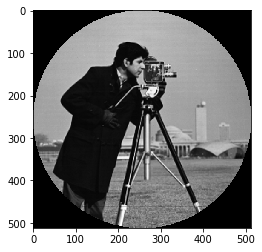

In [33]:
plt.imshow(camera,'gray')

# 5.彩色图像

彩色图像也可能使用Numpy的数组来表示，只不过比灰度图像多了一个维度。

In [34]:
cat = data.chelsea()
print('shape of clolor image = ',cat.shape)

shape of clolor image =  (300, 451, 3)


对像素的索引区别不大，只不过彩色图像返回的是RGB或其他彩色空间类型值

In [36]:
print('pixel = ',cat[10,20])

pixel =  [151 129 115]


In [ ]:
#设置第50行第60列的像素为0
cat[50,60] = 0
# 设置第50行第60列的像素为绿色
cat[50,60] = [0,255,0]

对彩色图像，同样可以使用Mask方式索引，例如：

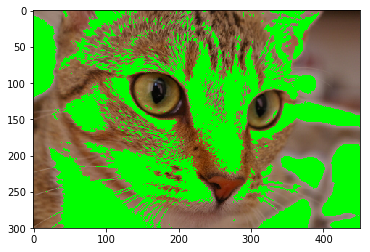

In [37]:
cat = data.chelsea()
# 对图像第一个通道像素进行Mask索引
reddish = cat[:,:,0] > 160
cat[reddish] = [0,255,0]
plt.imshow(cat)

# 6.坐标约定

由于我们使用Numpy array来表示图像，所以图像的坐标必须同Numpy的array相对应。如下所示：

| 图像类型    | 坐标         |
|--------------|:----------------:|
|2D灰度图像   |(row,col )      |
|2D多通道图像  |(row,col,ch )    |
|3D灰度图像   |(pln,row,col )   |
|3D多通道图像  |(pln,row,col,ch ) |

参考：

[1]. http://scikit-image.org/docs/stable/user_guide/numpy_images.html#numpy-indexing